# K-Means Clustering Project

## Purpose
* The purpose of this project is to build a K-Means clustering model to detect note are genuine or not.

## Data set
* The visualization result is shown in the figurebelow. 
• V1 is variance of this data set. 
• V2 is skewness of this data set.

# Method used
- Numpy for data features, like nearness, mean, std
   - mean and std calculated 

- pandas to read and perform certen operation
- KMean to divide datapoints in groups

# Data Analysis Limitation

- all the visualization has been done like mean, std deviasion, datapoints in data,  k-points of clusters centers to get insights about data

- hear i selected 5  k points, 3 groups in middle contains most datapoints, so it can be considered as real note

and for groups are in corner (top-right and bottom-left) contain very less datapoints so in practical points of view  data points near these groups can be considered as Fake note

-  But for accurate result we need more improved datasets that indicate status of note like fake or real(0,1) for each datapoints as we do not have domain knowledge to decide which datapoints are representing real notes and which representing fake notes

## Recommend
According to the results, it showed us a accuracy of 90%. this model can find most of genuine banknotes.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv("files/banknotes.csv")

# overview of data
data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


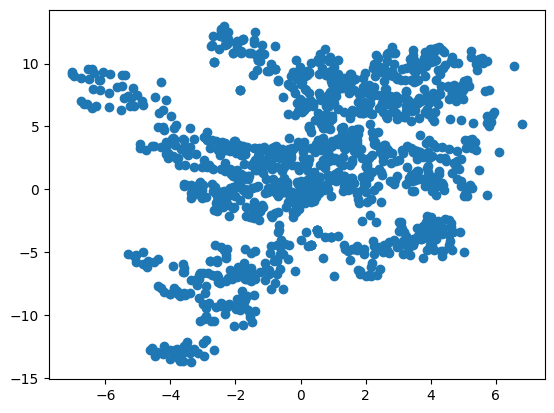

In [14]:
v1 = data['V1']
v2 = data['V2']
plt.scatter(v1, v2)
plt.show()  #visivalizing data

In [15]:
# converting data into numpy structure
np_data = np.column_stack((v1, v2))
np_data

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [19]:
#finding mean datapoint of data
data_mean = np.mean(np_data, 0)
data_mean


array([0.43373526, 1.92235312])

In [59]:
#finding std datapoint of data
data_std = np.std(np_data, 0)
data_std


array([2.84172641, 5.86690749])

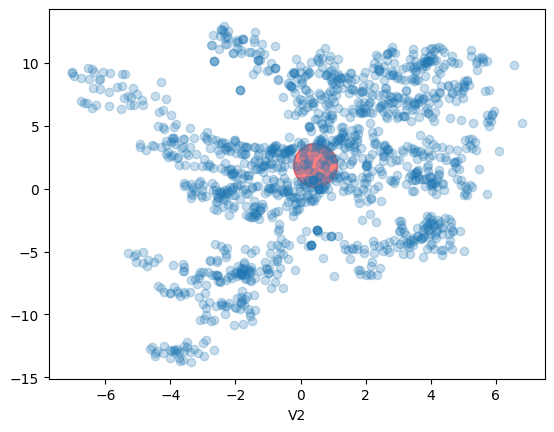

In [60]:
#plotting mean point of data
plt.scatter(data_mean[0], data_mean[1], c="red", alpha=0.5, s= 1000)
plt.scatter(v1, v2, alpha= 0.25)
plt.xlabel("V1")
plt.xlabel("V2")

plt.show()

In [61]:
#lokking at K-mean cluster
from sklearn.cluster import KMeans
k_points = KMeans(n_clusters = 5).fit(np_data)

C:\python10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
k_points.cluster_centers_

array([[ 2.78143809,  7.81050625],
       [-2.47956909, -8.12080214],
       [-0.51298986,  1.62999871],
       [ 3.11556749, -2.22652874],
       [-3.04283047,  9.30051102]])

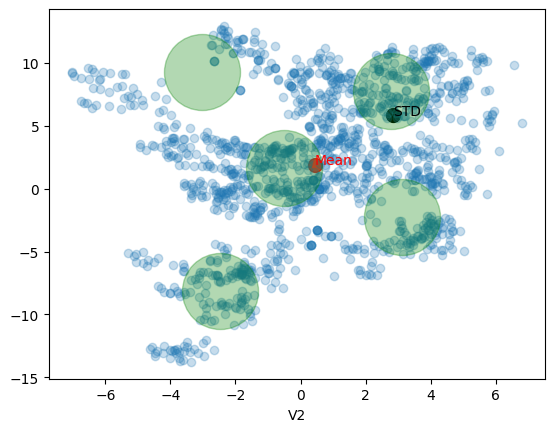

In [65]:
k_mean_points = k_points.cluster_centers_
#plotting mean point of data
plt.text(data_mean[0], data_mean[1], "Mean", c="red", alpha=1, )
plt.scatter(data_mean[0], data_mean[1], s = 100, c="red", alpha=0.8, )
plt.text(data_std[0], data_std[1], "STD", c="Black", alpha=1, )
plt.scatter(data_std[0], data_std[1], s = 100, c="Black", alpha=1, )

plt.scatter(v1, v2, alpha= 0.25)
plt.scatter(k_mean_points[:,0],k_mean_points[:,1], s = 3000, alpha=0.30, color="green")

plt.xlabel("V1")
plt.xlabel("V2")


plt.show()